In [1]:
import pandas as pd
import numpy as np
import datetime
from datetime import timedelta
import random
import glob
%matplotlib inline
import matplotlib.pyplot as plt

# スクレイピング結果の保存先
file_dir_path = '../../data/'
# 乱数seed固定
random.seed(1234) 

In [2]:
import matplotlib
print(matplotlib.rcParams['font.family'])

['Hiragino sans']


In [3]:
# データの読み込み
path = '../../reshape_data.csv'
data = pd.read_csv(path)

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,2,3,4,5,6,7,8,9,10,12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
data.head()

,Unnamed: 0,ツイートID,ツイート時刻,ツイート本文,いいね数,リツイート数,ID,ユーザー名,アカウント名,自己紹介文,フォロー数,フォロワー数,アカウント作成日時,検索ワード,文字数,ヘッダー画像の有無,ヘッダーURLの有無,アカウント稼働日数
0,0,1.631308e+18,2023-03-03,.\n✨🎎3日間ひなまつりコラボ🎎✨\n【まっつんさん× 睡眠ちゃん】\n\n🌸━━━━🌸\...,83,100,1049273245222858752,suim_1,睡眠ちゃん,元ホス狂いツイッタラー🌈 サブ垢🍃:@suim_2 🥣: #睡眠ごはん 🏡:#睡眠ハウス コ...,718.0,22208.0,2018-10-08,ひなまつり,194.0,0.0,1.0,1607.0
1,1,1.631417e+18,2023-03-03,@salonbuzzkazu1 @njsj12m カズ社長、おはようございます。\n本日は、...,0,0,865597357,hitosimasuhiro,益弘®︎均​ ⛄️｜マインド系歯科医師(Hitoshi Masuhiro)｜戸上軍団 最高顧問,皆様のフォロワーを増やすお手伝いをさせて頂いています。｜Twitter運用の詳細を知りたい方...,20816.0,27801.0,2012-10-07,ひなまつり,88.0,1.0,1.0,3799.0
2,2,1.631417e+18,2023-03-03,RT @oyakodon82tori: おはようございます😃\n金曜だー🥳🥳🥳\nひなまつり...,0,2,2714376320,ritsurin48330go,りゅう,とっくの昔に成人済。おばぁちゃんレイヤーです。基本雑多垢。原神はタルタリヤと ディルック推し...,629.0,634.0,2014-08-07,ひなまつり,88.0,1.0,0.0,3130.0
3,3,1.631417e+18,2023-03-03,@kazuikukazu おはようございます~❣😊\nかずさん✨(ฅ'ω'ฅ)🐾🎎\nひなま...,0,0,2586574525,Kuwatomo084,くわとも,気軽にライダー仲間が出来たら 一番初めに乗ったのがＭＲ５０今は レンタルバイクで楽しんでます...,3805.0,3832.0,2014-06-25,ひなまつり,175.0,1.0,1.0,3173.0
4,4,1.631417e+18,2023-03-03,RT @TMitaka: うれしいひなまつり https://t.co/pWax688Trp...,0,11,2948265242,ZirouSabu,アパタカと8にゃんとパル,#germanshepherd アパッチ君とタカオ君 #Ragamuffin ママのパオちゃ...,6063.0,7182.0,2014-12-29,ひなまつり,57.0,1.0,0.0,2986.0


## アカウント登録日数といいね数との関係性

In [5]:
data1 = data[['いいね数', 'アカウント稼働日数']]
data1['稼働日数【年】'] = data1['アカウント稼働日数'] / 360
data1 = data1[data1['いいね数'].astype(str).str.isdecimal()]
data1['いいね数'] = pd.to_numeric(data1['いいね数'], errors='coerce')
print(data1.isnull().sum())
data1 = data1.fillna(0)
#data1['稼働日数【年】'] = data1['稼働日数【年】'].astype('int')
#data1['稼働日数【年】'] = data1['稼働日数【年】'].astype('str')
#data1['いいね数'] = data1['いいね数'].astype('str')
print(data1.dtypes)

/var/folders/m2/sv15qrgj6lq9vywplmj8nl840000gn/T/ipykernel_23275/86439367.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['稼働日数【年】'] = data1['アカウント稼働日数'] / 360


いいね数              0
アカウント稼働日数    190869
稼働日数【年】      190869
dtype: int64
いいね数           int64
アカウント稼働日数    float64
稼働日数【年】      float64
dtype: object


いいね数           int64
アカウント稼働日数    float64
稼働日数【年】      float64
dtype: object


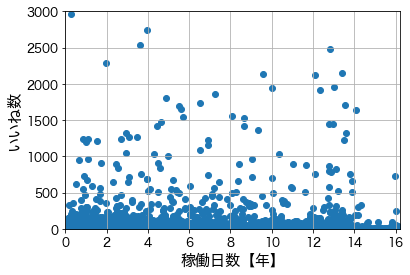

In [7]:
graph_data = data1.sample(100000)
print(graph_data.dtypes)
# グラフの装飾
plt.xlim(graph_data['稼働日数【年】'].min(), graph_data['稼働日数【年】'].max())
plt.ylim(graph_data['いいね数'].min(), 3000)

plt.xlabel("稼働日数【年】", fontsize=15)
plt.ylabel("いいね数", fontsize=15)
plt.grid(True)
plt.tick_params(labelsize = 12) # (9)目盛線のラベルサイズ
x_data = graph_data['稼働日数【年】'].to_numpy().astype(np.float64)
y_data = graph_data['いいね数'].to_numpy().astype(np.int64)

plt.scatter(x_data, y_data)


## ツイートと文字数

In [15]:
data3 = data[['いいね数', '文字数']]
data3 = data3[data3['いいね数'].astype(str).str.isdecimal()]
data3['いいね数'] = pd.to_numeric(data3['いいね数'], errors='coerce')
data3 = data3.fillna(0)

いいね数      int64
文字数     float64
dtype: object


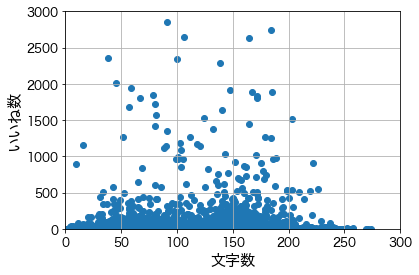

In [16]:
graph_data = data2.sample(100000)
print(graph_data.dtypes)
# グラフの装飾
#plt.xlim(graph_data['文字数'].min(), graph_data['文字数'].max())
plt.xlim(graph_data['文字数'].min(), 300)
plt.ylim(graph_data['いいね数'].min(), 3000)

plt.xlabel("文字数", fontsize=15)
plt.ylabel("いいね数", fontsize=15)
plt.grid(True)
plt.tick_params(labelsize = 12) # (9)目盛線のラベルサイズ
x_data = graph_data['文字数'].to_numpy().astype(np.float64)
y_data = graph_data['いいね数'].to_numpy().astype(np.int64)

plt.scatter(x_data, y_data)

## リツイート数のいいね数

In [18]:
data3 = data[['いいね数', 'リツイート数']]
data3 = data3[data3['いいね数'].astype(str).str.isdecimal()]
data3['いいね数'] = pd.to_numeric(data3['いいね数'], errors='coerce')
data2 = data2.fillna(0)

data3 = data3[data3['リツイート数'].astype(str).str.isdecimal()]
data3['リツイート数'] = pd.to_numeric(data3['リツイート数'], errors='coerce')
data3 = data3.fillna(0)

いいね数      int64
リツイート数    int64
dtype: object


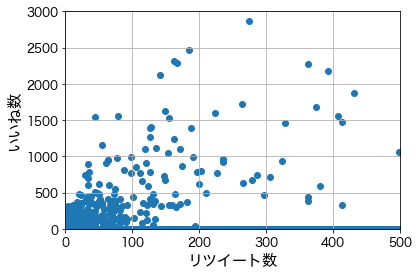

In [20]:
graph_data = data3.sample(100000)
print(graph_data.dtypes)
# グラフの装飾
#plt.xlim(graph_data['文字数'].min(), graph_data['文字数'].max())
plt.xlim(graph_data['リツイート数'].min(), 500)
plt.ylim(graph_data['いいね数'].min(), 3000)

plt.xlabel("リツイート数", fontsize=15)
plt.ylabel("いいね数", fontsize=15)
plt.grid(True)
plt.tick_params(labelsize = 12) # (9)目盛線のラベルサイズ
x_data = graph_data['リツイート数'].to_numpy().astype(np.float64)
y_data = graph_data['いいね数'].to_numpy().astype(np.int64)

plt.scatter(x_data, y_data)